This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

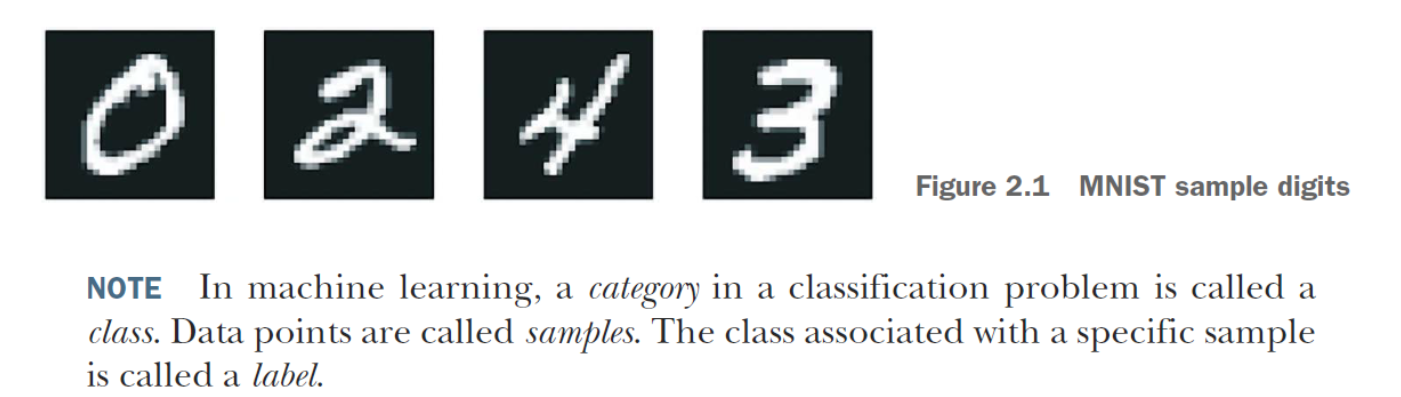

**Loading the MNIST dataset in Keras**

#### train_images and train_labels form the training set, the data that the model will learn from. The model will then be tested on the test set, test_images and test_labels.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### The network architecture
- 512 neuron을 가진 레이어 하나와 10개의 클래스를 가진 fully connected 레이어로 구성된 간단한 순차 구조 모델
***
- An <span style="color:blue">optimizer</span>—The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
-  A <span style="color:blue">loss function</span>—How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
- <span style="color:blue">Metrics</span> to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    
])

### 모델 컴파일
- 옵티마이저 rmsprop, loss 함수 sparse_categorical_crossentropy, 성능측정은 accuracy로 설정함 

In [ ]:
model.compile(   )

**Preparing the image data**

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### "Fitting" the model: 모델 학습

In [ ]:
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=128)

### 학습된 모델을 사용하여 숫자 인식: prediction

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)


In [ ]:
import matplotlib.pyplot as plt
digit = test_digits[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Test 데이터를 사용하여 모델 성능 검증

In [ ]:
test_loss, test_acc = 
print(f"test_acc: {test_acc}")

## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np


### Vectors (rank-1 tensors)

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

In [ ]:
x.shape

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

In [ ]:
x.shape

### Key attributes: A tensor is defined by three key attributes
- <span style="color:blue">Number of axes (rank)</span>—For instance, a rank-3 tensor has three axes, and a matrix
has two axes. This is also called the tensor’s ndim in Python libraries such as
NumPy or TensorFlow.
- <span style="color:blue">Shape</span>—This is a tuple of integers that describes how many dimensions the tensor
has along each axis. For instance, the previous matrix example has shape
(3, 5), and the rank-3 tensor example has shape (3, 3, 5). A vector has a shape
with a single element, such as (5,), whereas a scalar has an empty shape, ().
- <span style="color:blue">Data type (usually called dtype in Python libraries)</span>—This is the type of the data
contained in the tensor; for instance, a tensor’s type could be float16, float32,
float64, uint8, and so on. In TensorFlow, you are also likely to come across
string tensors.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Displaying the fourth digit**

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Manipulating tensors in NumPy

In [ ]:
my_slice = 
my_slice.shape

In [ ]:
my_slice =
my_slice.shape

In [ ]:
my_slice = 
my_slice.shape

In [ ]:
my_slice = 
my_slice.shape

In [ ]:
my_slice = 
my_slice.shape

In [ ]:
plt.imshow(my_slice[0], cmap=plt.cm.binary)
plt.show()

In [5]:
my_slice2 = np.array([[1,2,3,1,5,6,7,8,9],
                      [1,2,3,2,5,6,7,8,9],
                      [1,2,3,3,5,6,7,8,9],
                      [1,2,3,4,5,6,7,8,9],
                      [1,2,3,5,5,6,7,8,9],
                      [1,2,3,6,5,6,7,8,9],
                      [1,2,3,7,5,6,7,8,9],
                      [1,2,3,8,5,6,7,8,9],
                      [1,2,3,9,5,6,7,8,9]
                     ])
my_slice2.shape

(9, 9)

array([[4, 5, 6, 7],
       [5, 5, 6, 7],
       [6, 5, 6, 7]])

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

- <span style="color:blue">Vector data</span>—Rank-2 tensors of shape (samples, features), where each sample is a vector of numerical attributes (“features”)
- <span style="color:blue">Timeseries data or sequence data</span>—Rank-3 tensors of shape (samples, timesteps, features), where each sample is a sequence (of length timesteps) of feature vectors
- <span style="color:blue">Images</span>—Rank-4 tensors of shape (samples, height, width, channels), where each sample is a 2D grid of pixels, and each pixel is represented by a vector of values (“channels”)
- <span style="color:blue">Video</span>—Rank-5 tensors of shape (samples, frames, height, width, channels), where each sample is a sequence (of length frames) of images

### Vector data

- An actuarial dataset of people, where we consider each person’s age, gender,
and income. Each person can be characterized as a vector of 3 values, and thus
an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape
(100000, 3).
- A dataset of text documents, where we represent each document by the counts
of how many times each word appears in it (out of a dictionary of 20,000 common
words). Each document can be encoded as a vector of 20,000 values (one
count per word in the dictionary), and thus an entire dataset of 500 documents
can be stored in a tensor of shape (500, 20000).

## Timeseries data or sequence data

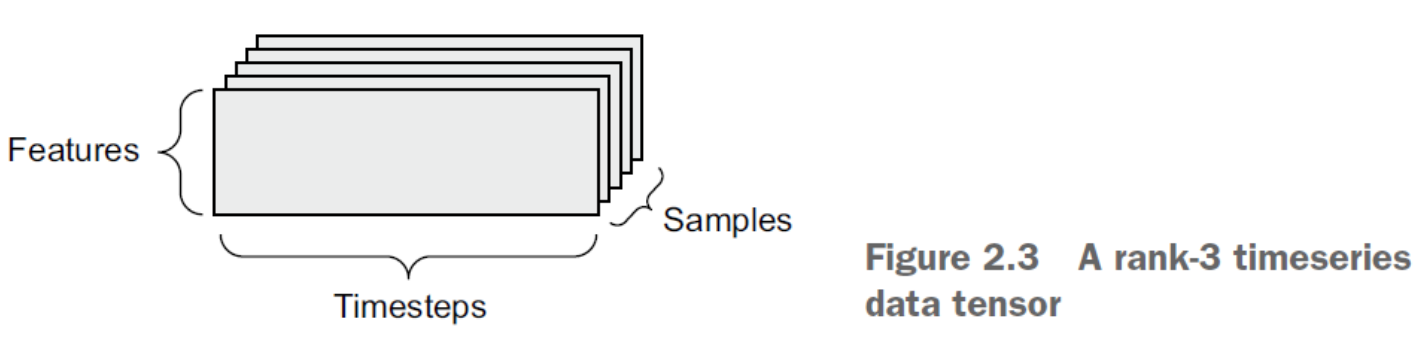

- <span style="color:blue">Whenever time matters in your data</span> (or the notion of sequence order), it makes sense
to store it in a rank-3 tensor with an explicit time axis. Each sample can be encoded as
a sequence of vectors (a rank-2 tensor), and thus a batch of data will be encoded as a
rank-3 tensor (see figure 2.3).


- A dataset of stock prices. Every minute, <span style="color:blue">we store the current price of the stock, the highest price in the past minute, and the lowest price in the past minute</span>. Thus, every minute is encoded as a 3D vector, an entire day of trading is encoded as a matrix of shape (390, 3) (there are 390 minutes in a trading day), and 250 days’ worth of data can be stored in a rank-3 tensor of shape <span style="color:blue">(250, 390, 3)</span>. Here, each sample would be one day’s worth of data.
- A dataset of tweets, where <span style="color:blue">we encode each tweet as a sequence of 280 characters out of an alphabet of 128 unique characters. In this setting, each character can be encoded as a binary vector of size 128</span> (an all-zeros vector except for a 1 entry at the index corresponding to the character). Then each tweet can be encoded as a rank-2 tensor of shape (280, 128), and a dataset of 1 million tweets can be stored in a tensor of shape <span style="color:blue">(1000000, 280, 128)</span>.

## Image data

- <span style="color:blue">Images typically have three dimensions: height, width, and color depth</span>. Although grayscale images (like our MNIST digits) have only a single color channel and could thus be stored in rank-2 tensors, by convention image tensors are always rank-3, with a one-dimensional color channel for grayscale images. A batch of 128 <span style="color:red">grayscale images</span> of size 256 × 256 could thus be stored in a tensor of shape (128, 256, 256, <span style="color:red">1</span>), and a batch of 128 <span style="color:red">color images</span> could be stored in a tensor of shape (128, 256, 256, <span style="color:red">3</span>)


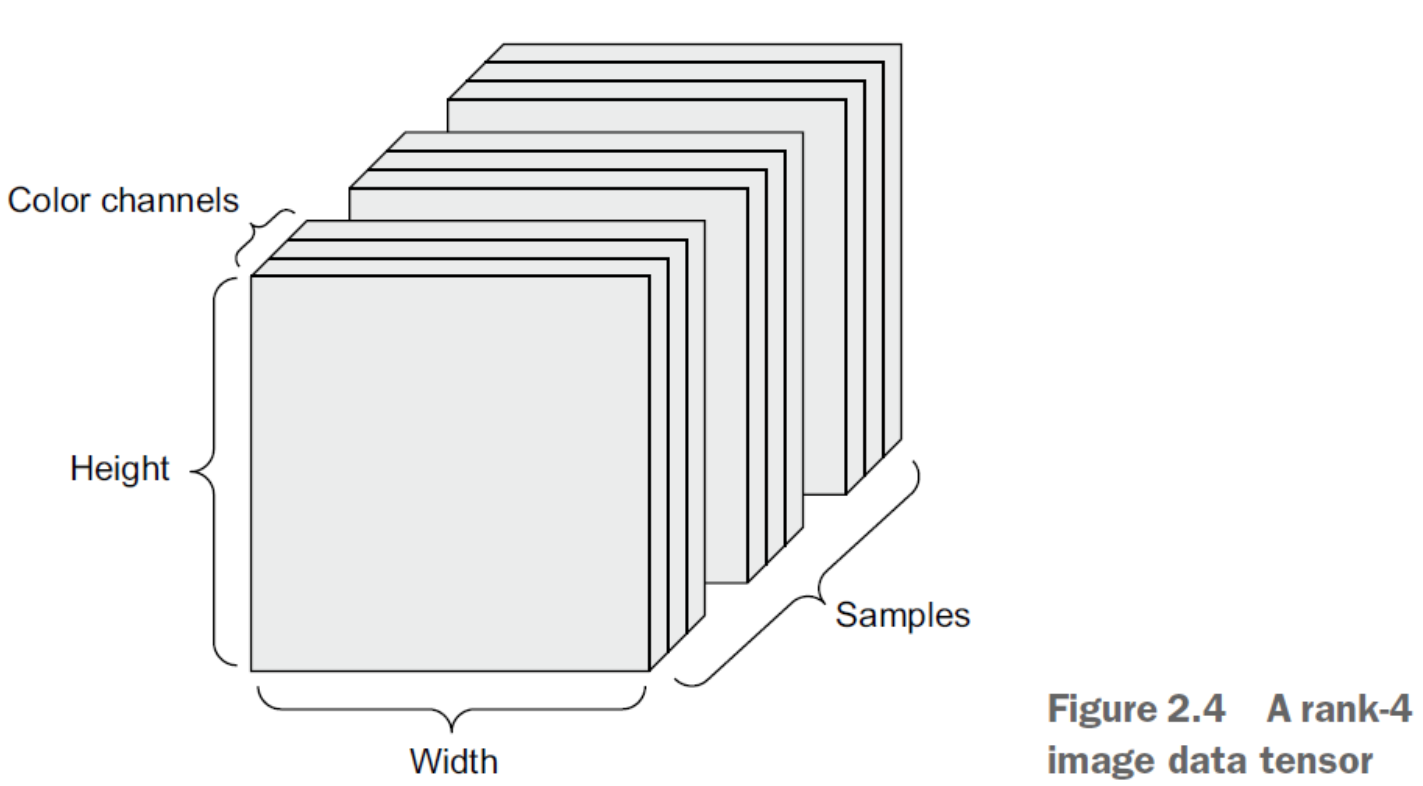

There are two conventions for shapes of image tensors: <span style="color:blue">the channels-last convention (which is standard in TensorFlow)</span> and the <span style="color:blue">channels-first convention</span> (which is increasingly falling out of favor).
The channels-last convention places the color-depth axis at the end: (samples, height, width, color_depth). Meanwhile, the channels-first convention places the color depth axis right after the batch axis: (samples, color_depth, height, width). With the channels-first convention, the previous examples would become (128, 1,
256, 256) and (128, 3, 256, 256). The Keras API provides support for both formats.

### Video data

<span style="color:red">Video data is one of the few types of real-world data for which you’ll need rank-5 tensors</span>. A video can be understood as a sequence of frames, each frame being a color image. Because <span style="color:red">each frame</span> can be stored in <span style="color:red">a rank-3 tensor (height, width, color_depth)</span>, a <span style="color:red">sequence of frames</span> can be stored in a <span style="color:red">rank-4 tensor (frames, height, width, color_depth)</span>, and thus <span style="color:red">a batch of different videos can be stored in a rank-5 tensor of shape (samples, frames, height, width, color_depth)</span>. For instance, a 60-second, 144 × 256 YouTube video clip sampled at 4 frames per second would have 240 frames. A batch of four such video clips would be stored in a
tensor of shape (4, 240, 144, 256, 3).

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
#     print(_)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
z = x + y
z = np.maximum(z, 0.)


In [ ]:
z[0]

### Broadcasting
- 큰 텐서의 ndim에 맞게 축(axis)을 추가하고 작은 텐서가 큰 텐서의 크기에 맞도록 반복됨 

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))
X.shape, y.shape

In [ ]:
y = np.expand_dims(y, axis=0)
y.shape

In [ ]:
# repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10)
Y = np.concatenate([y] * 32, axis=0)
Y.shape

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)  # 두 배열을 비교하여 요소별 최대값을 가진 배열을 반환

In [ ]:
z.shape

In [ ]:
z

### Tensor product

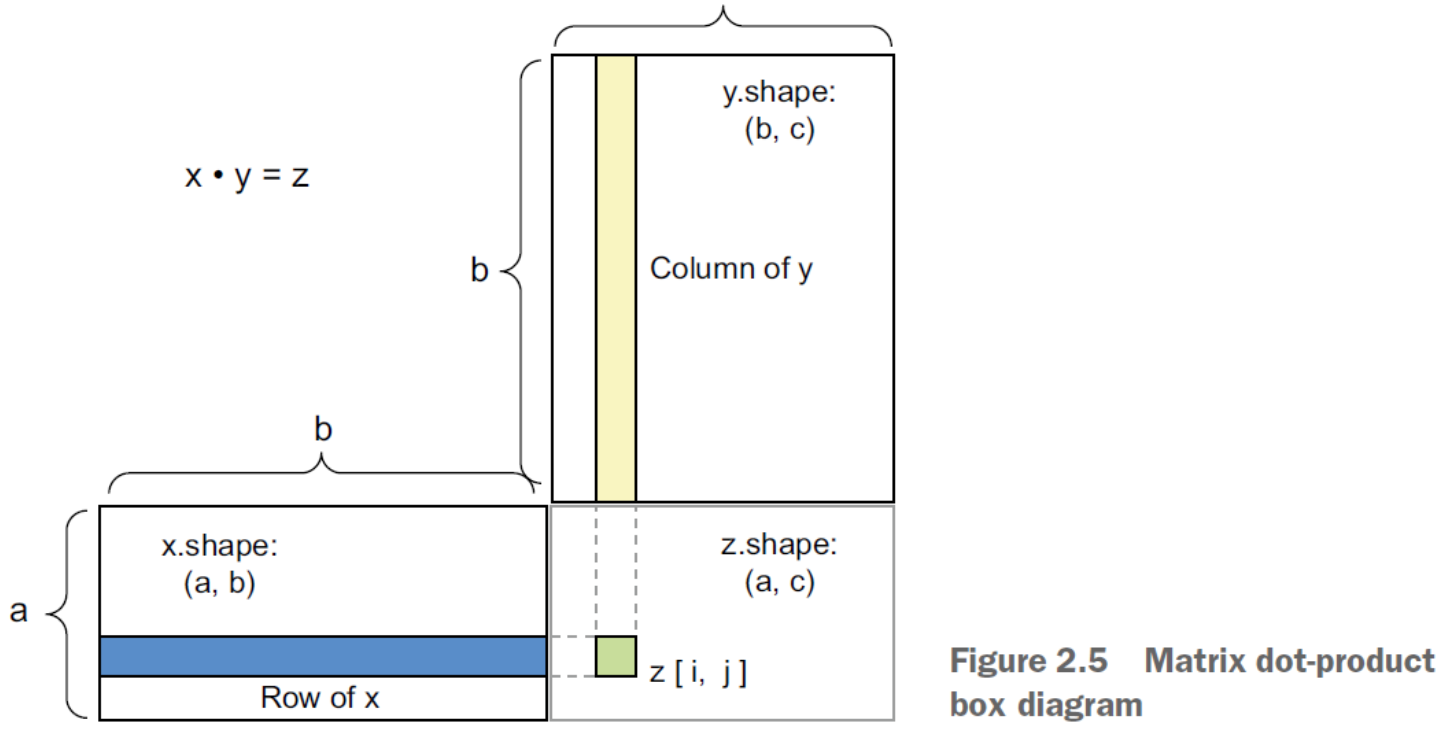

### Tensor reshaping

A third type of tensor operation that’s essential to understand is tensor reshaping. Although it wasn’t used in the Dense layers in our first neural network example, we used it when we preprocessed the digits data before feeding it into our model


In [ ]:
x  = train_images
x.shape

In [ ]:
x = 
x.shape

In [ ]:
plt.imshow(x[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x2 = x.reshape(60000,28,28)
plt.imshow(x2[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x) # 전치행렬 만들기
x.shape

### Geometric interpretation of tensor operations

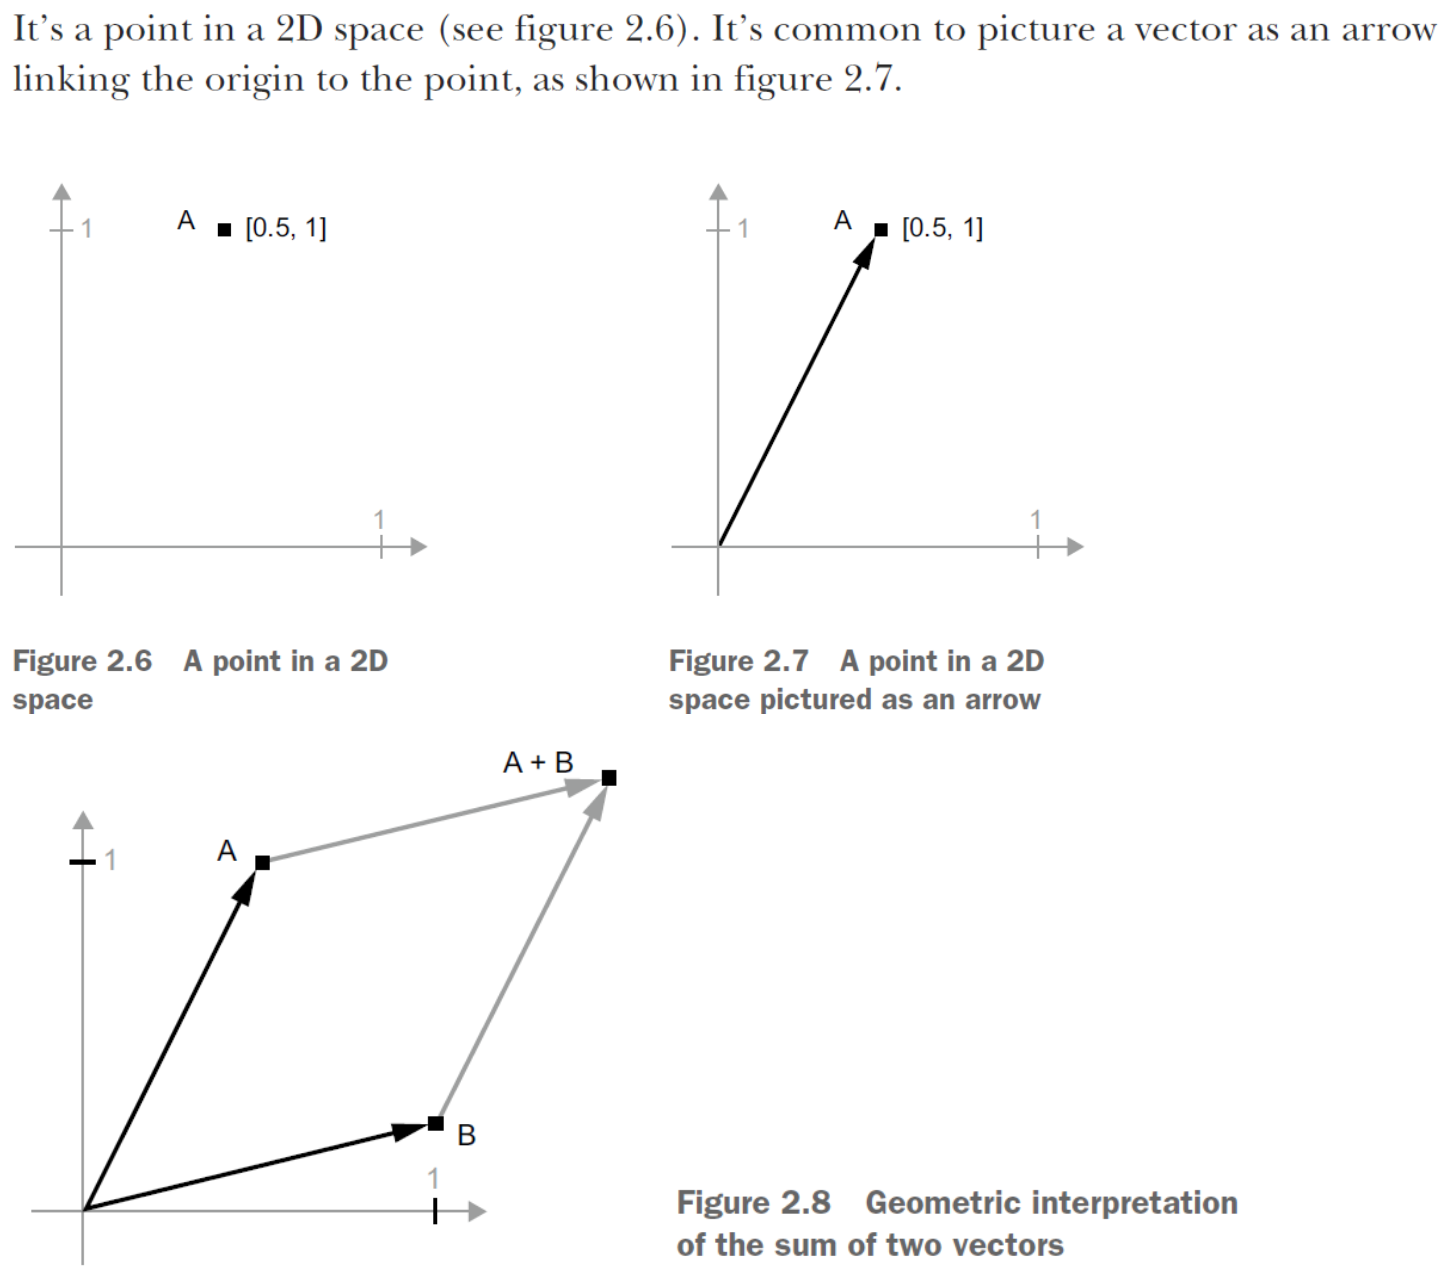

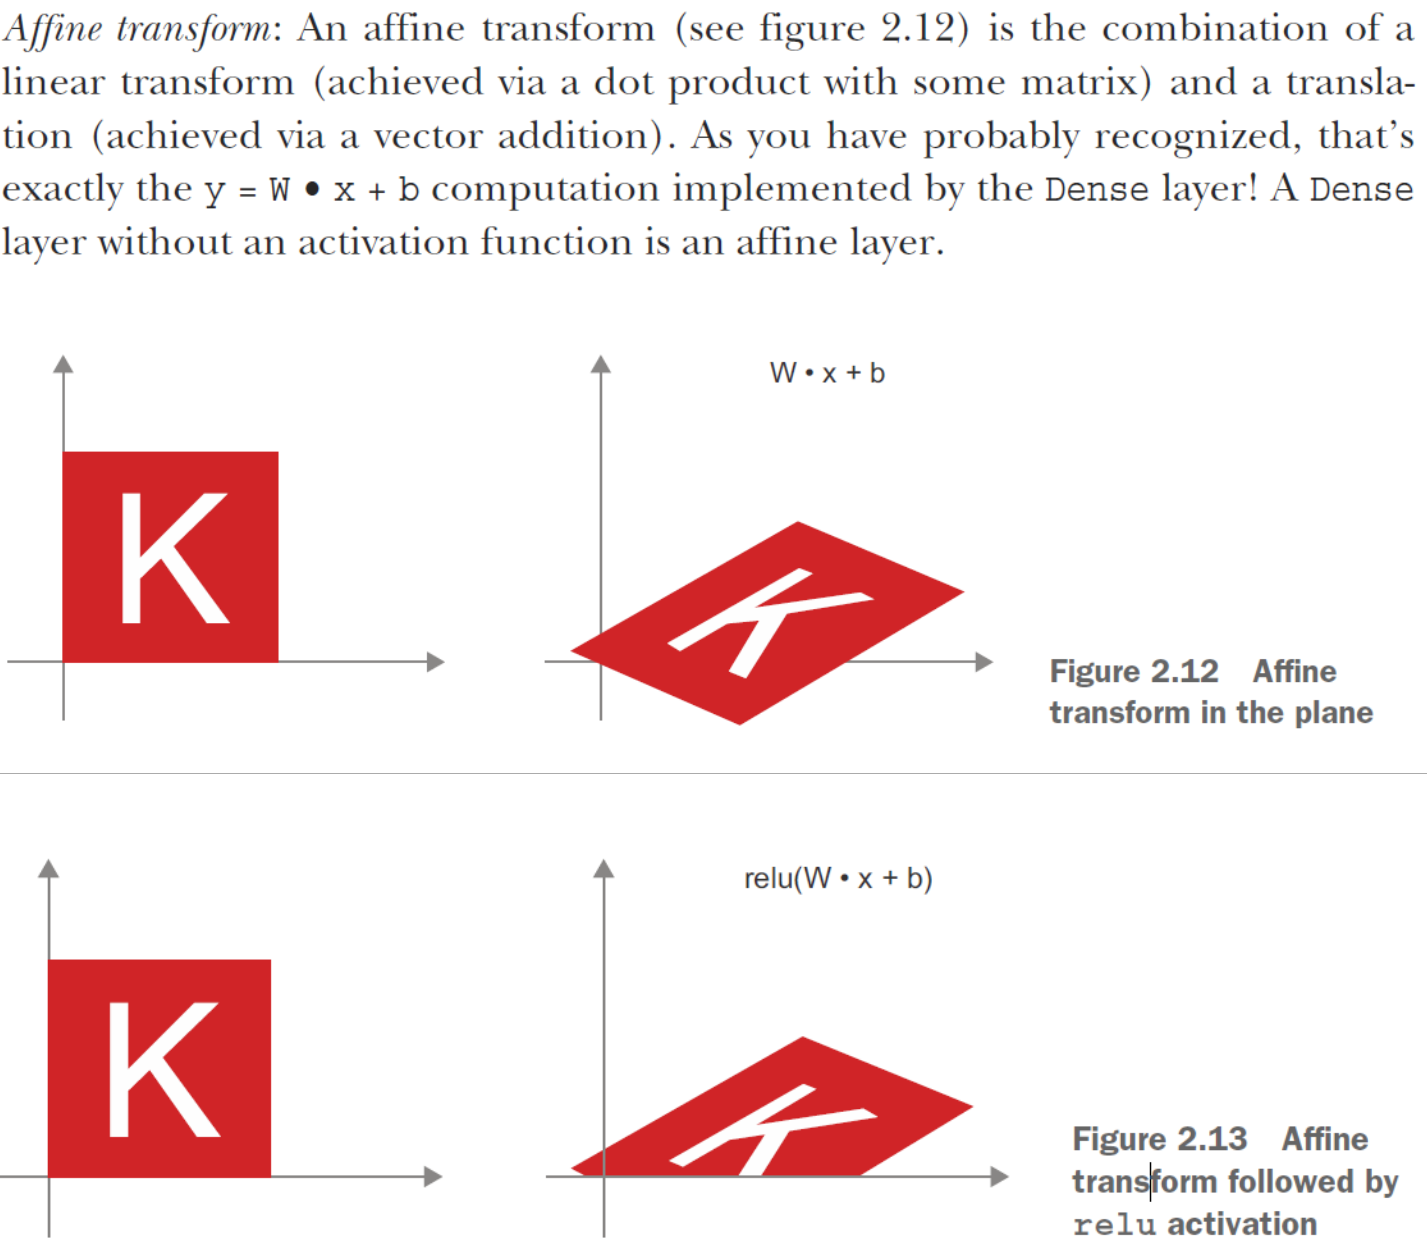


### A geometric interpretation of deep learning

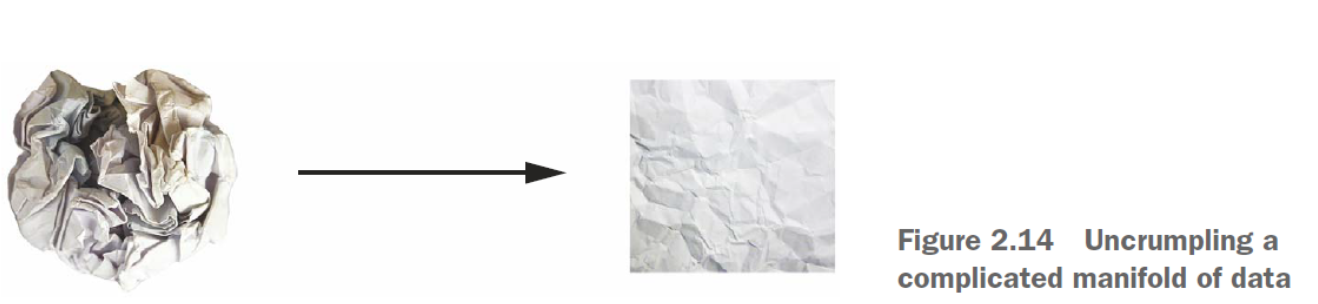

## The engine of neural networks: gradient-based optimization

- As you saw in the previous section, each neural layer from our first model example
transforms its input data as follows:
- <span style="color:red">output = relu(dot(input, W) + b)</span>
- In this expression, W and b are tensors that are attributes of the layer. They’re called
the weights or trainable parameters of the layer (the kernel and bias attributes, respectively).
These weights contain the information learned by the model from exposure to
training data.

- Gradient descent is the optimization technique that powers modern neural networks. Here’s the gist of it. All of the functions used in our models (such as dot or +) transform their input in a smooth and continuous way: if you look at z = x + y, for instance, a small change in y only results in a small change in z, and if you know the direction of the change in y, you can infer the direction of the change in z. Mathematically,
you’d say these functions are <span style="color:red"> differentiable</span>.

### What's a derivative?(한 점에서의 순간적인 변화율, 기울기)

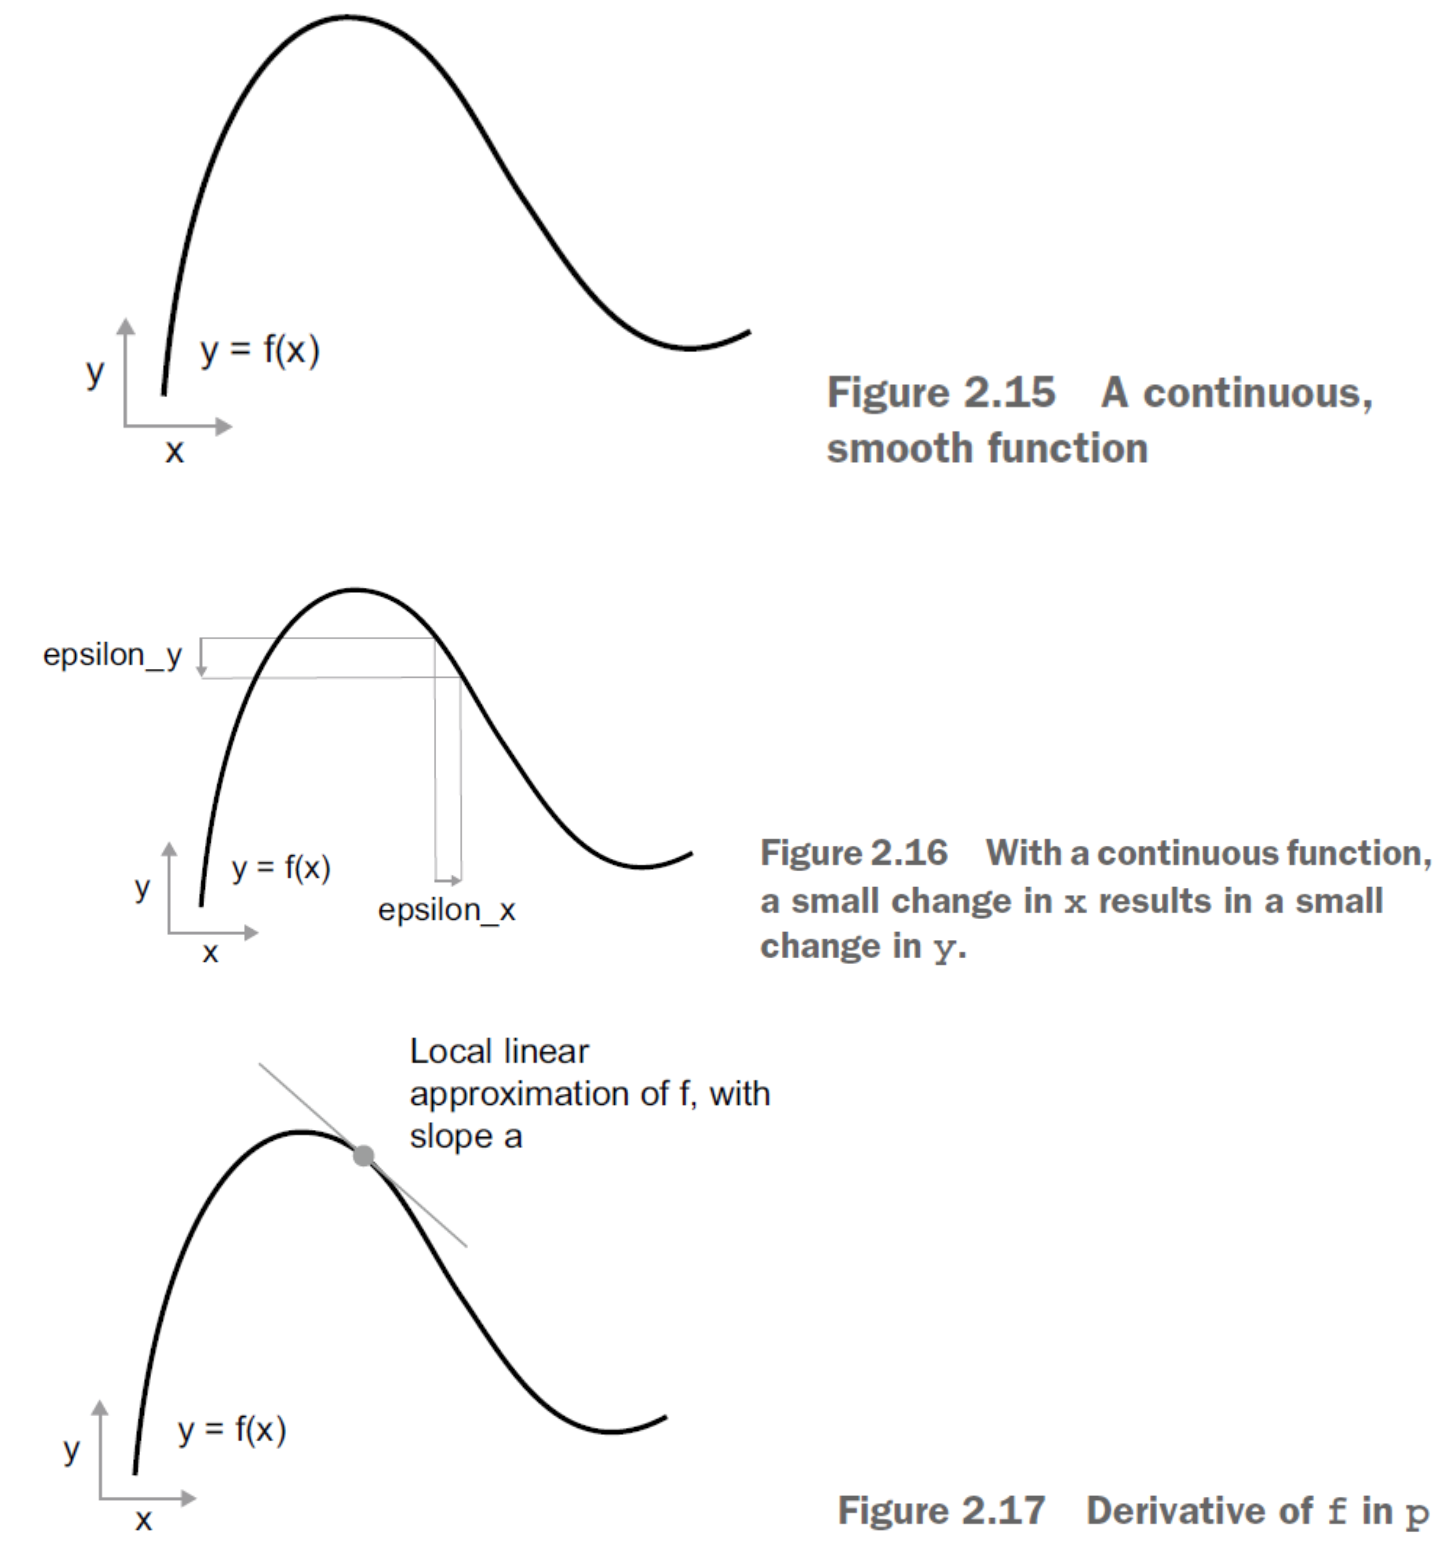

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

- 가능한 가장 작은 손실 함수를 생성하는 가중치 값의 조합을 손실함수(loss function)의 수학적 계산은 파라미터 수가 적을 때는 가능하지만 딥러닝의 경우 파라미터의 수가 수천 개에서 수천만 개가 될 수 있어서 현실적으로 불가능함
- 실제로는.......  

1. Draw a batch of training samples, x, and corresponding targets, y_true.
2. Run the model on x to obtain predictions, y_pred (this is called the forward pass).
3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
4.  Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).
5. Move the parameters a little in the opposite direction from the gradient—for example, W -= 
<span style="color:red">learning_rate * gradient</span>—thus reducing the loss on the batch
a bit. The learning rate (learning_rate here) would be a scalar factor modulating
the “speed” of the gradient descent process.


- Easy enough! What we just described is called mini-batch <span style="color:red">stochastic gradient descent (mini-batch SGD)</span>. The term stochastic refers to the fact that each batch of data is drawn at random (stochastic is a scientific synonym of random)

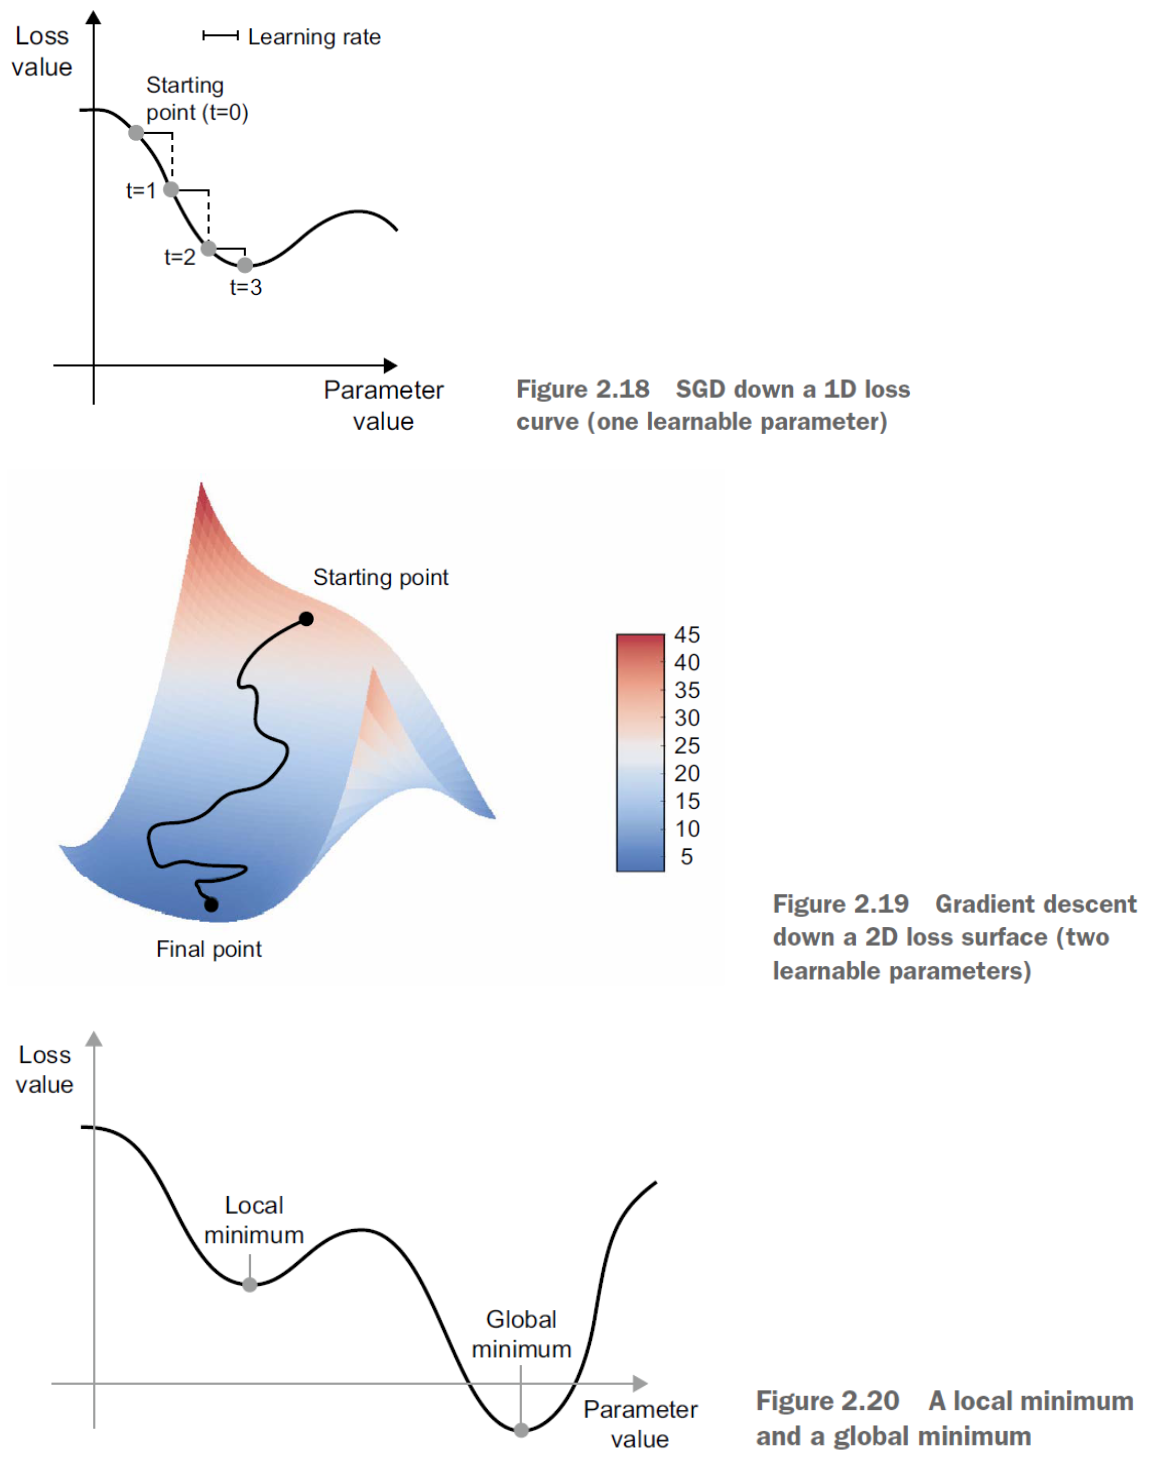

## <span style="color:red"> Chaining derivatives: The Backpropagation algorithm<span>